In [1]:
#inporting all modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
df.head()

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,sizes,product_link,img_link,product_tag,brand_tag,discount_amount,discount_percent
0,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,Onesize,wallets/lino-perros/lino-perros-women-peach-co...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",wallets,lino-perros,467,36
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,"UK6,UK7,UK8,UK9,UK10,UK11",flip-flops/mast--harbour/mast--harbour-men-nav...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",flip-flops,mast--harbour,715,55
2,Printed A-line Kurta,Biba,4.3,66,1999,1599,"S,M,L,XL,XXL,3XL",kurtas/biba/biba-women-off-white--black-printe...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurtas,biba,400,20
3,Girls Floral Printed T-shirt,Anthrilo,0.0,0,599,539,"7-8Y,8-9Y,9-10Y",tshirts/anthrilo/anthrilo-girls-white-floral-p...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",tshirts,anthrilo,60,10
4,Women Printed Kurta with Skirt,FASHION DWAR,0.0,0,2899,2899,"S,M,L,XL",kurta-sets/fashion-dwar/fashion-dwar-women-mul...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurta-sets,fashion-dwar,0,0


In [2]:
df.columns

Index(['product_name', 'brand_name', 'rating', 'rating_count', 'marked_price',
       'discounted_price', 'sizes', 'product_link', 'img_link', 'product_tag',
       'brand_tag', 'discount_amount', 'discount_percent'],
      dtype='object')

In [3]:
df['product_name'].count

<bound method Series.count of 0              Croc Textured Two Fold Wallet
1                        Men Striped Sliders
2                       Printed A-line Kurta
3               Girls Floral Printed T-shirt
4             Women Printed Kurta with Skirt
                         ...                
168024            Ethnic Motifs Kaftan Dress
168025    Leather Wedge Sandals with Tassels
168026                   Leather Wedge Pumps
168027        V015 Professional Hair Trimmer
168028                  Women Open Toe Flats
Name: product_name, Length: 168029, dtype: object>

In [4]:
a='https://myntra.com/'+df['product_link'][0]
a

'https://myntra.com/wallets/lino-perros/lino-perros-women-peach-coloured-croc-textured-two-fold-wallet/18070682/buy'

18070682 is the product id available on website which is available on link so we have to extract id from link

In [5]:
c=df['product_link'][0].split('/')[-2]
c

'18070682'

In [6]:
df['product_id']= 0

In [7]:
# we already found the number of column
count=list(range(168027))
for i in count:
    df['product_id'][i]=df['product_link'][i].split('/')[-2]
    

<ipython-input-7-e7d82418ac9a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['product_id'][i]=df['product_link'][i].split('/')[-2]


In [8]:
df['product_id']

0         18070682
1         12548958
2         13446092
3         18017006
4         18015232
            ...   
168024    18245896
168025    18713222
168026    18713224
168027           0
168028           0
Name: product_id, Length: 168029, dtype: int64

# 1. How many unique products are there in the dataset? (5 marks)
You need to find product ID of each product from product_link and then find the number of unique product ids

Finding Unique Products as per their Product ID

Removing Products with Duplicate Product ID

In [9]:
# finding unique product per id
product_id=df['product_id']
uni_product=product_id.nunique()
uni_product

146436

In [10]:
df1=df.drop_duplicates(subset=['product_id'])
product_id_drop=df1['product_id']
uni_product_drop=product_id_drop.nunique()
uni_product_drop

146436

# 2. What is the average rating of the products? (2 mark)
Try it without the product that are having rating 0

Try it without the product that are having 0 people given any rating

In [11]:
#       avg_rating=df[df['rating']!=0.0].mean()


# 3. What is the average discount percentage of the products?

In [12]:
avg_disc_price=df['discounted_price'].mean()
avg_disc_price

1515.1687565836849

# 4. What are the top 5 most expensive products? (2 marks)
Make sure that there can be multiple brands with same name so you can take brand ID also into considration

In [13]:
group_df=df.groupby('brand_name').apply(lambda x: x.sort_values(['marked_price'],ascending=False))


In [14]:
df2=df.sort_values(['marked_price'],ascending=False)
df2['product_name'].head(5)

27039                                Lord Krishna Showpiece
56197                           Durga Maa On Lion Showpiece
117817    Men Stainless Steel Straps Multi Function Auto...
117809    Men Stainless Steel Straps Multi Function Auto...
116473    Men Stainless Steel Straps Multi Function Auto...
Name: product_name, dtype: object

# 5. What are the top 10 brands by the number of products in the dataset?

In [15]:
 count_of_brand=df.groupby("brand_name")["product_id"].count()

sorted_counts=count_of_brand.sort_values(ascending=False)

sorted_counts.head(10)

brand_name
Roadster                 4982
Mast & Harbour           2640
DressBerry               2330
H&M                      2188
max                      2045
Anouk                    1962
HRX by Hrithik Roshan    1922
HERE&NOW                 1816
Puma                     1805
MANGO                    1741
Name: product_id, dtype: int64

# 6.List top 5 brands with maxiumum average rating of products? (2 marks)
Neglect the products which are not reviewed by any person

In [16]:
df5=df[df['rating'].notna()]

brand_rating=df.groupby('brand_name')['rating'].mean()

top_5_brand=brand_rating.sort_values(ascending=False).head(10)

top_5_brand

brand_name
1 Stop Fashion               5.0
Pasabahce                    5.0
Joseph Joseph                5.0
Pro-Ethic STYLE DEVELOPER    5.0
BEAUTY GLAZED                5.0
Ozone Ayurvedics             5.0
MILDCARES                    5.0
TIC TAC TOE                  4.9
NISRAG HOME                  4.9
Bodycare First               4.9
Name: rating, dtype: float64



# 7. Plot a histogram of the distribution of ratings of following brand. (3 marks)
H&M     
max     
Puma    
MANGO     
Neglect the products which are not reviewed by any person

In [17]:
df7=df
HM_ratings=df7[df["brand_name"]=='H&M']['rating']
max_ratings=df7[df["brand_name"]=='max']['rating']
Puma_ratings=df7[df["brand_name"]=='Puma']['rating']
MANGO_ratings=df7[df["brand_name"]=='MANGO']['rating']

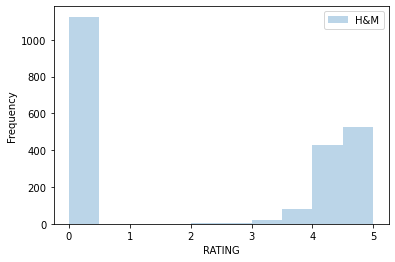

In [18]:
plt.hist(HM_ratings, bins=10, alpha=0.3, label='H&M')
plt.xlabel('RATING')
plt.ylabel('Frequency')
plt.legend()
plt.show()

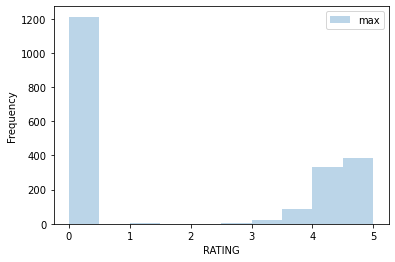

In [19]:
plt.hist(max_ratings, bins=10, alpha=0.3, label='max')
plt.xlabel('RATING')
plt.ylabel('Frequency')
plt.legend()
plt.show()

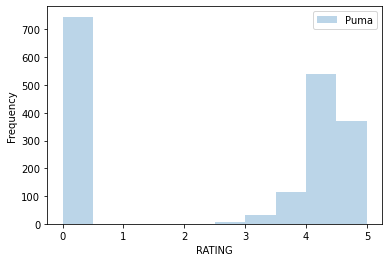

In [20]:
plt.hist(Puma_ratings, bins=10, alpha=0.3, label='Puma')
plt.xlabel('RATING')
plt.ylabel('Frequency')
plt.legend()
plt.show()


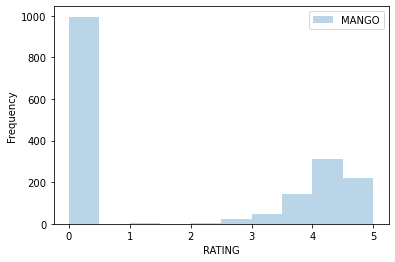

In [21]:
plt.hist(MANGO_ratings, bins=10, alpha=0.3, label='MANGO')
plt.xlabel('RATING')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 8. What is the distribution of discounts by brand for specific brands mentioned below? (2 marks)
H&M
max
Puma
MANGO
Neglect the products which are not reviewed by any person. Neglect the products which are not on any discount.

In [22]:
brands=['H&M','max','Puma','MANGO']
df8=df[df['brand_name'].isin(brands)]

discount_counts=df8.groupby('brand_name')['discount_percent'].count()

In [23]:
discount_percent=df8.groupby('brand_name')['discount_percent'].mean()

discount_percent

brand_name
H&M       1.935558
MANGO    15.074670
Puma     37.194460
max       0.797066
Name: discount_percent, dtype: float64

# 9. Is there any trend or pattern you can find between discount percent and rating of the product? (3 marks)# 

<function matplotlib.pyplot.show(*args, **kw)>

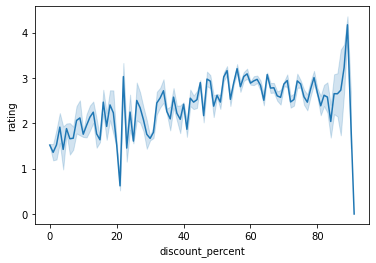

In [24]:
sns.lineplot(data=df,x='discount_percent',y='rating')
plt.show

larger discount have higher rating and  at 20 and 90 percent its showing unsual diff

# 10. What are the top 10 most popular tags in the dataset? (2 marks)

In [25]:
df['product_tag'].value_counts().head(10)

tshirts         16978
shirts          12044
dresses         11836
tops             9049
kurta-sets       8170
kurtas           8043
jeans            7669
trousers         5756
casual-shoes     5230
handbags         4944
Name: product_tag, dtype: int64

In [26]:
df['brand_tag'].value_counts().head(10)

roadster                 4982
mast--harbour            2640
dressberry               2330
hm                       2188
max                      2045
anouk                    1962
hrx-by-hrithik-roshan    1922
herenow                  1816
puma                     1805
mango                    1741
Name: brand_tag, dtype: int64

# 11. Are there any relations between the rating and number of people who rated the products? (4 marks)
Neglect the products that are not reviewed by any person

Neglect the products that are having zero rating

# 12. What are the top 10 Most Expensive brands? (3 marks)
Use marked price as the reference to find the most expensive brand

In [27]:
brand_price=df.groupby('brand_name')['marked_price'].mean()

top_5_brand=brand_price.sort_values(ascending=False).head(10)

top_5_brand

brand_name
EARNSHAW                 47603.846154
Victorinox               44000.000000
MOSCHINO COUTURE         40000.000000
dyson                    39233.333333
Tom Ford                 38800.000000
Valuchi                  38050.000000
Bottega Veneta           34490.000000
Versace Jeans Couture    33125.000000
TISSOT                   31928.571429
DUCATI CORSE             31665.666667
Name: marked_price, dtype: float64

# 13. What are the top 10 Most Expensive Product Category? (4 marks)
Use marked price as the reference to find the most expensive brand# 

In [28]:
product_price=df.groupby('product_name')['marked_price'].mean()

top_5_product=product_price.sort_values(ascending=False).head(10)

top_5_product

product_name
Lord Krishna Showpiece                                              113999.000000
Durga Maa On Lion Showpiece                                          71999.000000
Men Stainless Steel Straps Multi Function Automatic Motion Watch     57200.000000
Men Stainless Steel Straps Automatic Motion Watch                    46077.222222
Men Leather Straps Multi Function Automatic Motion Watch             45825.000000
Airwrap Complete Hair Styler                                         44900.000000
Men Brass Dial & Automatic Watch                                     44500.000000
Mid-Rise Stretchable Jeans                                           41000.000000
Printed Carpets                                                      40350.000000
Men Regular Fit Cotton Jeans                                         39000.000000
Name: marked_price, dtype: float64

# 14. Analyse the Violen Plot of watches of following brands mentioned below ? (5 marks)
Take Marked Price for Reference

Take product_tag as watches

Take brand_tag as tommy-hilfiger, daniel-wellington, armani-exchange, emporio-armani, earnshaw, tissot

Make sure to write your inference based on the violen plot of following watch brands price

In [29]:
df14=df[df['product_tag']== "watches"] 

brands=['tommy-hilfiger', 'daniel-wellington', 'armani-exchange','emporio-armani', 'earnshaw', 'tissot']
df14=df14[df14['brand_tag'].isin(brands)]

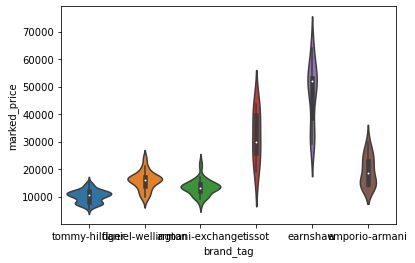

In [30]:
sns.violinplot(x='brand_tag',y='marked_price',data=df14)
plt.show()

# 15. List top 5 brands which are having most wide range or products
Use marked price as the reference

In [31]:
sort_brand_counts=df.groupby('brand_name')['product_name'].nunique().sort_values(ascending=False)

sort_brand_counts.head(5)

brand_name
Roadster      1595
H&M           1571
MANGO         1145
Puma          1101
DressBerry    1061
Name: product_name, dtype: int64